In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [7]:
bank = pd.read_csv(r"/content/bank.csv",sep=";")

In [8]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
## Label Encoding our Target Variable
encoder=preprocessing.LabelEncoder()
bank["y"]=encoder.fit_transform(bank["y"])

In [12]:
bank["y"]  ## 0 -> Not Subscribed(No) and 1-> Subscribed(Yes)

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
## CHECKING FOR IMBALANCE DATA
bank["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [16]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
categorical_features=bank[["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]]

In [121]:
#@title Primary Analysis For Categorical FEatures:



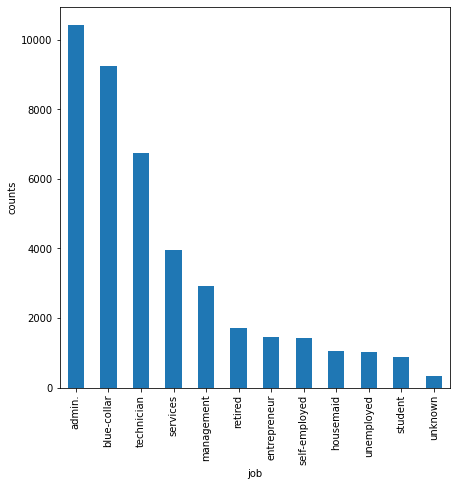

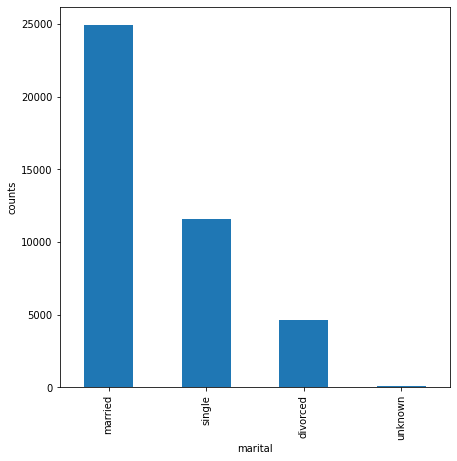

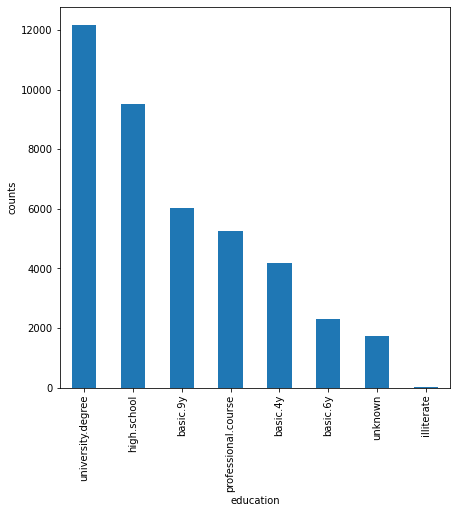

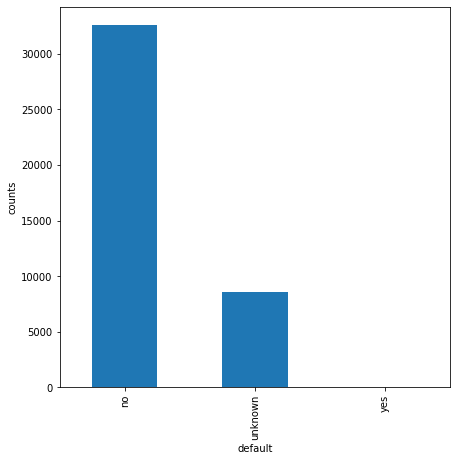

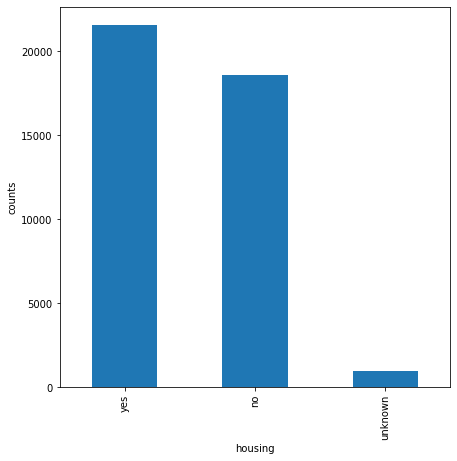

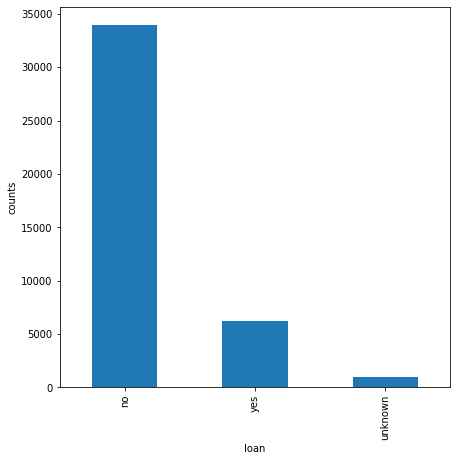

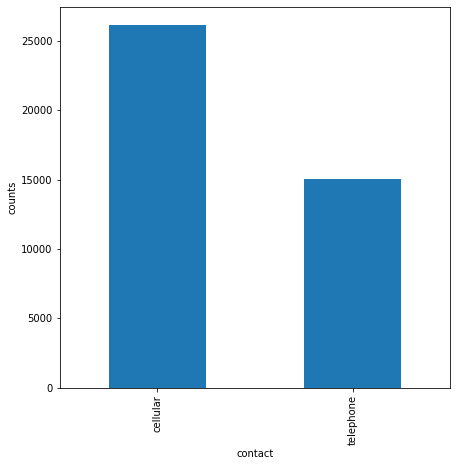

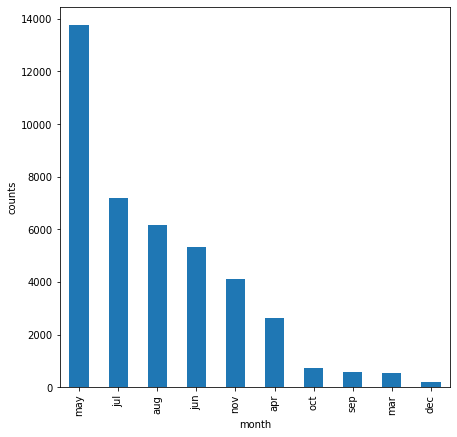

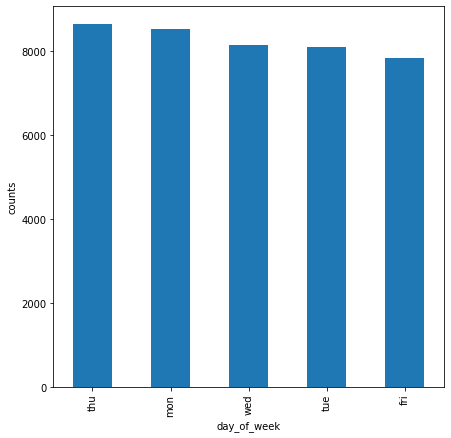

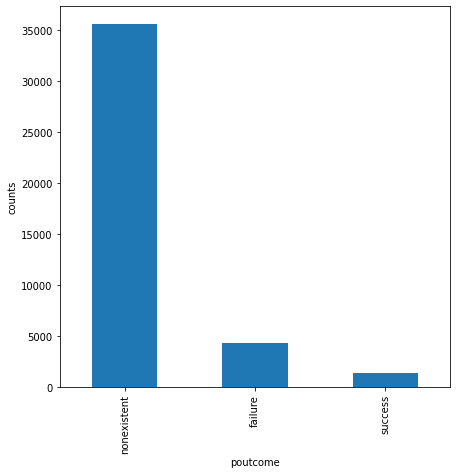

In [27]:
for columns in categorical_features:
    plt.figure(figsize=(7,7))
    plt.xlabel(columns)
    plt.ylabel("counts")
    bank[columns].value_counts().plot(kind="bar")


In [29]:
##AS WE CAN SEE HERE THERE ARE MANY ENTRIES UNDER UNKNOWN NAME.THIS IS LIKE MISSING DATA ONLY SO WE HAVE TO REPLACE IT WITH MODE

In [31]:
for columns in categorical_features:
    mode=bank[columns].mode()[0]
    bank[columns]=bank[columns].replace("unknown",mode)

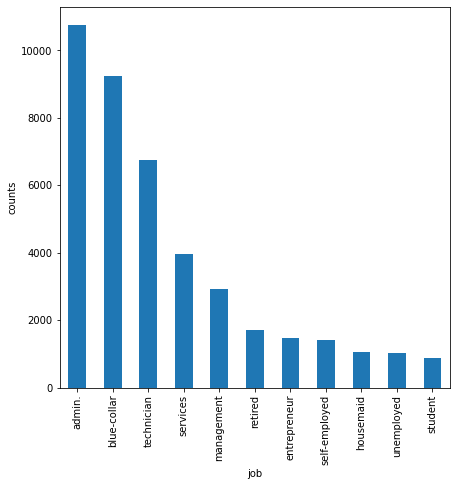

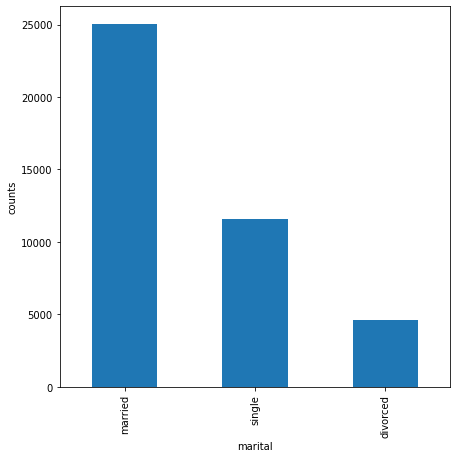

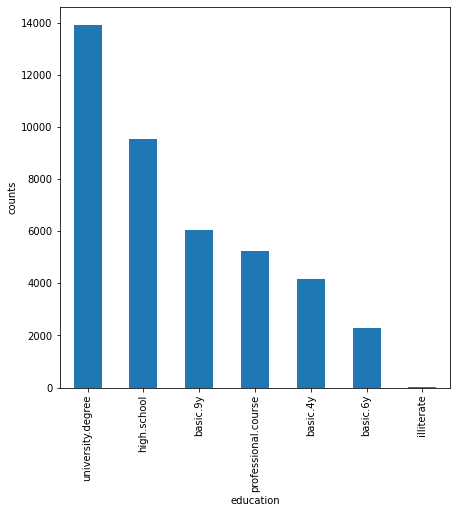

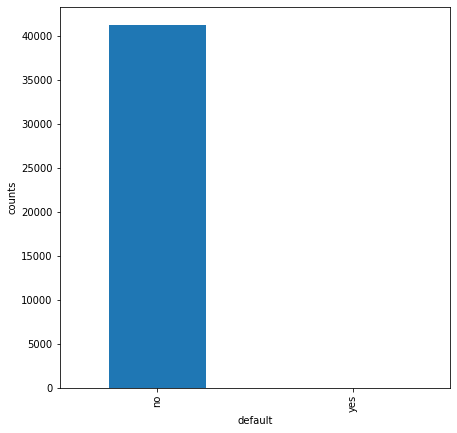

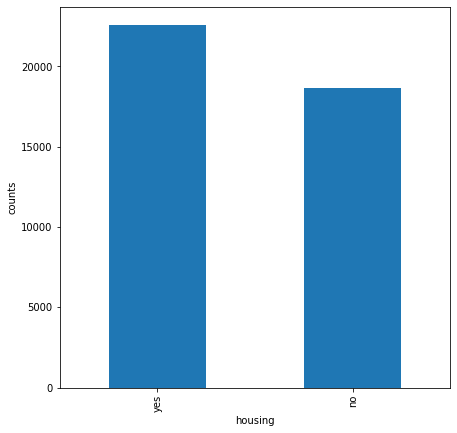

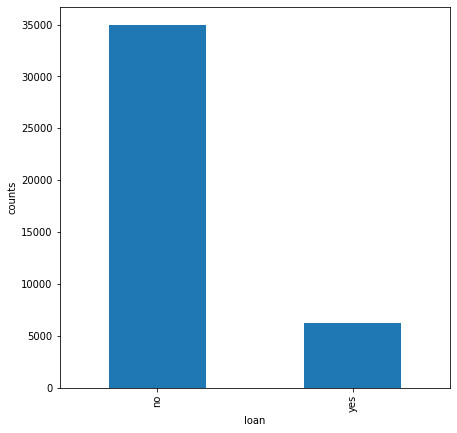

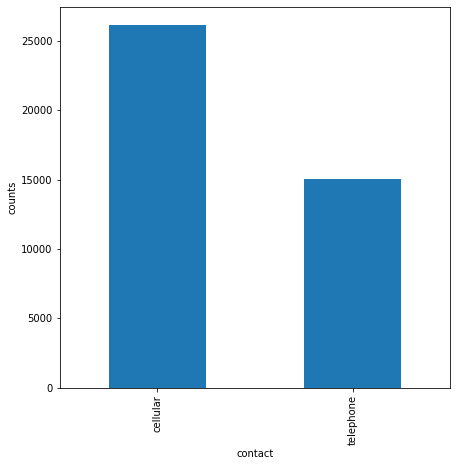

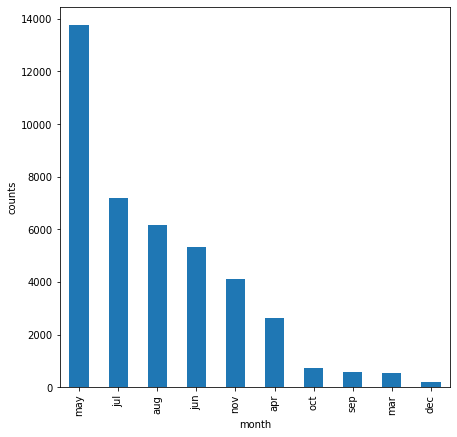

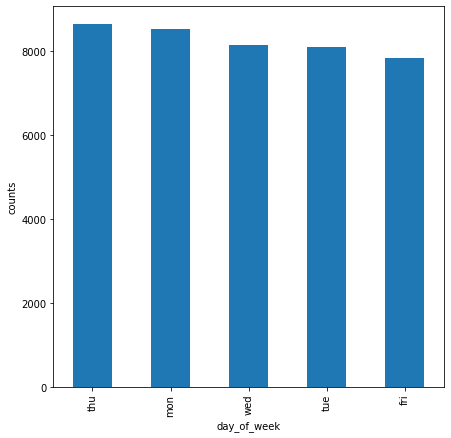

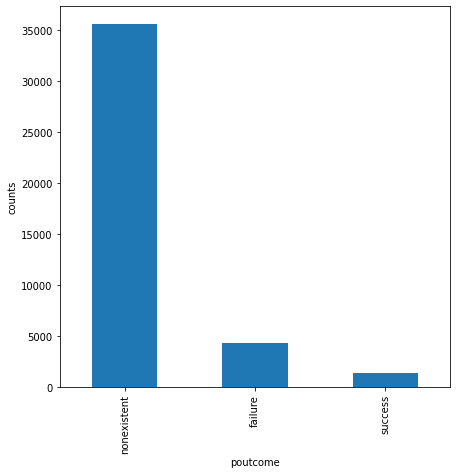

In [32]:
## WE CAN SEE ALL THE UNKNOWN ARE REPLACED BY MODE VALUE
for columns in categorical_features:
    plt.figure(figsize=(7,7))
    plt.xlabel(columns)
    plt.ylabel("counts")
    bank[columns].value_counts().plot(kind="bar")

In [123]:
##PRIMARY ANALYSIS CONCLUSION : 1) MOST OF THE JOBS CUSOMERS BELONGS TO ARE ADMINISTRATION,BLUE-COLLAR AND TECHNICIANS
                              #2) MOST OF THE CUSTOMERS ARE MARRIED 
                              #3) CUSTOMERS ARE WELL EDUCATED
                              #4) MAJORITY CUSTOMERS DO NOT HAVE CREDIT IN DEFAULT 
                              #5) MAJORITY OF CUSTOMERS APPLY FOR HOUSING LOAN 
                              #6) VERY FEW CUSTOMERS ARE INTRESTED IN PERSONAL LOAN
                              #7) MANY CUSTOMERS FAVOUR CELLULAR COMMUNICATION
                              #8) MOST OF THE CUSTOMERS CONTACT IN THE MONTH OF MAY

In [34]:
## WE WILL BE DOING LABEL ENCODING RATHER THAN DUMMIES CREATION. DUMMIES WOULD UNNECESSARILY INCREASE OUR FEATURES

In [36]:
encoder_1=preprocessing.LabelEncoder()
bank["job"]=encoder_1.fit_transform(bank["job"])

In [37]:
encoder_2=preprocessing.LabelEncoder()
bank["marital"]=encoder_2.fit_transform(bank["marital"])

In [38]:
encoder_3=preprocessing.LabelEncoder()
bank["education"]=encoder_3.fit_transform(bank["education"])

In [39]:
encoder_4=preprocessing.LabelEncoder()
bank["default"]=encoder_4.fit_transform(bank["default"])

In [40]:
encoder_5=preprocessing.LabelEncoder()
bank["housing"]=encoder_5.fit_transform(bank["housing"])

In [41]:
encoder_6=preprocessing.LabelEncoder()
bank["loan"]=encoder_6.fit_transform(bank["loan"])

In [42]:
encoder_7=preprocessing.LabelEncoder()
bank["contact"]=encoder_7.fit_transform(bank["contact"])

In [43]:
encoder_8=preprocessing.LabelEncoder()
bank["month"]=encoder_8.fit_transform(bank["month"])

In [44]:
encoder_9=preprocessing.LabelEncoder()
bank["poutcome"]=encoder_9.fit_transform(bank["poutcome"])

In [45]:
encoder_10=preprocessing.LabelEncoder()
bank["job"]=encoder_10.fit_transform(bank["job"])

In [46]:
encoder_11=preprocessing.LabelEncoder()
bank["day_of_week"]=encoder_11.fit_transform(bank["day_of_week"])

In [47]:
X=bank[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]
Y=bank["y"]

In [48]:
## TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [115]:
#@title SELECTING IMPORTANT FEATURES BASED ON RANDOM FOREST :


In [50]:
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [51]:
## WE WILL BE DOING OPTIMAZATION TO FIND BEST PARAMETRIC VALUES 
RF=RandomForestClassifier()

In [52]:
##SINCE OUR DATA IS LESS THAN 50K WE WILL BE CREATING LESS THAN 300 TREES
parameters={
    "n_estimators" :[10,50,100,150,200]
}

In [53]:
CLF=GridSearchCV(RF,parameters)

In [54]:
CLF.fit(X,Y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 150, 200]})

In [55]:
print(CLF.best_params_)

{'n_estimators': 10}


In [56]:
## Building RF model 
model=RandomForestClassifier(n_estimators=10,random_state=100)

In [57]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10, random_state=100)

In [58]:
model_accuracy=model.predict(X_test)

In [59]:
## Accuracy Score without feature selection
print("Accuracy score :",accuracy_score(Y_test,model_accuracy))

Accuracy score : 0.908877559278142


In [60]:
##HERE WE CAN SEE OUR RANDOM FOREST MODEL IS PROVIDING ACCURACY OF 90%

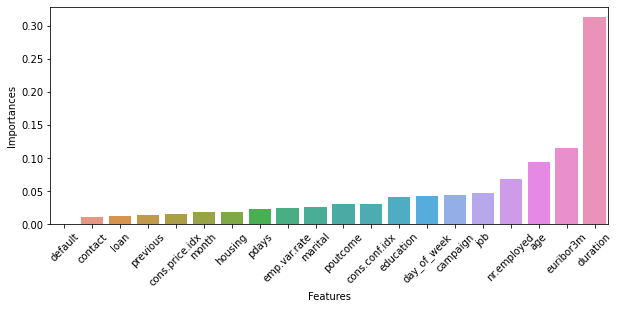

In [61]:
importances=model.feature_importances_
## creating a data frame for visualization
final_df=pd.DataFrame({
    "Features" :X_train.columns,
    "Importances" : importances
})
## sorting in ascending order for better visualization
final_df=final_df.sort_values("Importances")

## plotting the feature importance in barplot
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
sns.barplot(x="Features",y="Importances",data=final_df)

In [62]:
## CHECKING ACCURACY WITH FEATURE IMPORTANCES
## SELECTING MOST SIGNIFICANT TOP 10 FEATURES
model_1=RandomForestClassifier(n_estimators=10,random_state=100)
RF_tree=RFE(estimator=model_1,n_features_to_select=10,step=1)
X_train_RF_tree=RF_tree.fit_transform(X_train,Y_train)
Y_pred_RF=RF_tree.predict(X_test)
print(RF_tree.get_support())
print(RF_tree.ranking_)
print(accuracy_score(Y_test,Y_pred_RF))

[ True  True False  True False False False False False  True  True  True
  True False False False False  True  True  True]
[ 1  1  4  1 11  6  8 10  3  1  1  1  1  7  2  9  5  1  1  1]
0.9096058913975884


In [63]:
##FEATURES WHICH WHERE SELECTED ARE RANKED AS 1
selected_cols=[column for column in X_train.columns if column in X_train.columns[RF_tree.get_support()]]
selected_cols

['age',
 'job',
 'education',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [114]:
#@title OUT OF 20 FEATURES ABOVE 10 ARE MOST SIGNIFICANT FEATURES


In [113]:
#@title STANDARDISING :


In [67]:
## WE CAN SEE OUR DATA IS CONTAINING RANGE FROM FLOATING TO FOUR DIGIT NUMBERS WHICH CAN HAVE AFFECT OUR ACCURACY.
## TO AVOID SUCH SITUATION WE WILL DO STANDARDISATION 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [68]:
X=scaler.fit_transform(X)

In [112]:
#@title BUILDING SUPERVISED LEARNING MODEL :


In [111]:
#@title 1) LOGISTIC REGRESSION

In [71]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [72]:
LR.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
LR_pred=LR.predict(X_test)

In [74]:
print(confusion_matrix(Y_test,LR_pred))

[[10691   277]
 [  824   565]]


In [75]:
print("Accuracy score for LR:",accuracy_score(Y_test,LR_pred))

Accuracy score for LR: 0.9109007040543822


In [110]:
#@title 2)ADABOOST MODEL

In [77]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
AC=AdaBoostClassifier()

In [79]:
para={
    "n_estimators":[10,20,50,100,200],
    "learning_rate":[0.01,0.1,0.5,1]
}

In [80]:
CLFF=GridSearchCV(AC,para)

In [81]:
CLFF.fit(X,Y)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [10, 20, 50, 100, 200]})

In [82]:
print(CLFF.best_params_)

{'learning_rate': 0.01, 'n_estimators': 100}


In [83]:
ABM=AdaBoostClassifier(n_estimators=100,learning_rate=0.01)

In [84]:
ABM.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=100)

In [85]:
ABM_pred=ABM.predict(X_test)

In [86]:
print(confusion_matrix(Y_test,ABM_pred))

[[10968     0]
 [ 1389     0]]


In [87]:
print("Accuracy score for AB:",accuracy_score(Y_test,ABM_pred))

Accuracy score for AB: 0.8875940762320952


In [88]:
#@title 3)NAIVE BAYES MODEL


In [89]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB()

In [90]:
NB_pred=NB.predict(X_test)

In [91]:
print(confusion_matrix(Y_test,NB_pred))

[[9553 1415]
 [ 521  868]]


In [92]:
print("Accuracy score for NB:",accuracy_score(Y_test,NB_pred))

Accuracy score for NB: 0.8433276685279598


In [93]:
#@title 4)KNN MODEL


In [94]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

In [95]:
## FINDING VALUE OF K
np.sqrt(len(Y_test))

111.16204388189342

In [96]:
KNN_model=KNeighborsClassifier(n_neighbors=111,metric="euclidean")

In [97]:
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=111)

In [98]:
KNN_model_pred=KNN_model.predict(X_test)

In [99]:
print(confusion_matrix(Y_test,KNN_model_pred))

[[10649   319]
 [  744   645]]


In [100]:
print("Accuracy score for KNN:",accuracy_score(Y_test,KNN_model_pred))

Accuracy score for KNN: 0.9139758841142672


In [101]:
#@title 5)SVC MODEL


In [102]:
from sklearn.svm import SVC
svc=SVC()

In [103]:
svc.fit(X_train,Y_train)

SVC()

In [104]:
svc_pred=svc.predict(X_test)

In [105]:
print(confusion_matrix(Y_test,svc_pred))

[[10785   183]
 [ 1089   300]]


In [106]:
print("Accuracy score for SVC:",accuracy_score(Y_test,svc_pred))

Accuracy score for SVC: 0.8970623937848993


In [107]:
MODELS=list([LR,ABM,NB,KNN,svc])

In [108]:
ACCURACY=list([accuracy_score(Y_test,LR_pred),accuracy_score(Y_test,ABM_pred),accuracy_score(Y_test,NB_pred),accuracy_score(Y_test,KNN_model_pred),accuracy_score(Y_test,svc_pred)])


In [109]:
MODEL=pd.DataFrame({
    "MODEL" :MODELS,
    "ACCURACY":ACCURACY
})
print(MODEL)

                                               MODEL  ACCURACY
0                               LogisticRegression()  0.910901
1  (DecisionTreeClassifier(max_depth=1, random_st...  0.887594
2                                       GaussianNB()  0.843328
3                             KNeighborsClassifier()  0.913976
4                                              SVC()  0.897062
